<a href="https://colab.research.google.com/github/Gokul0Krishna/exp/blob/main/test6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bgcode



In [ ]:
!unzip "/content/archive (1).zip"
print("hello")

In [48]:
import os
import cv2
import numpy as np
from sklearn.metrics import classification_report
from skimage.feature import hog
from matplotlib.pyplot import imread, imshow, subplots, text, show
import joblib
import matplotlib.pyplot as plt

Archive:  /content/archive (1).zip
replace aquarium_pretrain/README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
clf = joblib.load("/content/marine_life.joblib")

In [152]:
from skimage.feature import local_binary_pattern
def complexity(image):
  image = np.array(image).reshape(len(image), -1)
  lbp = local_binary_pattern(image, 8, 1, method="uniform")#greater the no. more complex the image
  hist, _ = np.histogram(lbp, bins=8+2, range=(0, 8+2))
  hist = hist.astype(np.float32) / hist.sum()
  grad_mag=-np.sum(hist * np.log(hist + 1e-6))
  return grad_mag

# from re import U
def p(data1):
  data_array=np.array(data1)
  q1 = np.percentile(data_array, 25)
  q3 = np.percentile(data_array, 75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  print(f"lowerbound:{lower_bound} upperbound: {upper_bound}")
  LL.append(lower_bound)
  UL.append(upper_bound)
  print(min(LL),max(UL))
  return min(LL),max(UL)

# def p(data1):
#   data_array=np.array(data1)
#   q1 = np.percentile(data_array, 25)
#   q3 = np.percentile(data_array, 75)
#   iqr = q3 - q1
#   lower_bound = q1 - 1.5 * iqr
#   upper_bound = q3 + 1.5 * iqr
#   print(f"lowerbound:{lower_bound} upperbound: {upper_bound}")
#   LL.append(lower_bound)
#   UL.append(upper_bound)
#   print(np.mean(LL),np.mean(UL))
#   return np.mean(LL),np.mean(UL)

def go(ll,ul):
  pred,actual=[],[]
  for i in range(len(X)):
    j=complexity(X[i])
    if j<ll or j>ul:
      pred.append(clf.predict(X[i].reshape(1,-1))[0])
      actual.append(y[i])
  res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES))
  print(res)

def gno(ll,ul):
  pred,actual=[],[]
  for i in range(len(X)):
    j=complexity(X[i])
    if j>ll and j<ul:
      pred.append(clf.predict(X[i].reshape(1,-1))[0])
      actual.append(y[i])
  res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES))
  print(res)


# control

In [112]:
imagelist=[]
labellist=[]
for i in os.listdir("/content/aquarium_pretrain/test/images"):
  imagelist.append(f"/content/aquarium_pretrain/test/images/{i}")
for i in os.listdir("/content/aquarium_pretrain/test/labels"):
  labellist.append(f"/content/aquarium_pretrain/test/labels/{i}")
X,Y=[],[]
for i in range(len(imagelist)):
  img=imread(imagelist[i])
  height, width = img.shape[:2]
  with open(labellist[i], "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls_id = int(parts[0])
            x_center, y_center, w, h = map(float, parts[1:])

            # Convert to pixel coordinates
            x_center *= width
            y_center *= height
            w *= width
            h *= height

            x1 = int(x_center - w / 2)
            y1 = int(y_center - h / 2)
            x2 = int(x_center + w / 2)
            y2 = int(y_center + h / 2)

            # Crop object
            crop = img[y1:y2, x1:x2]
            if crop.size == 0:
                continue

            # Resize crop to standard size for HOG
            crop_resized = cv2.resize(crop, (64, 128))  # HOG default window

            # Convert to grayscale for HOG
            gray = cv2.cvtColor(crop_resized, cv2.COLOR_BGR2GRAY)

            # Extract HOG features
            features = hog(gray,
                           orientations=9,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           block_norm='L2-Hys',
                           transform_sqrt=True,
                           feature_vector=True)
            X.append(features)
            Y.append(cls_id)
X = np.array(X)
y = np.array(Y)
y_pred = clf.predict(X)
CLASS_NAMES = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
print(classification_report(y, y_pred, target_names=CLASS_NAMES))

              precision    recall  f1-score   support

        fish       0.42      0.94      0.58       249
   jellyfish       0.00      0.00      0.00       154
     penguin       0.00      0.00      0.00        82
      puffin       0.00      0.00      0.00        35
       shark       0.00      0.00      0.00        36
    starfish       0.00      0.00      0.00        11
    stingray       0.00      0.00      0.00        15

    accuracy                           0.40       582
   macro avg       0.06      0.13      0.08       582
weighted avg       0.18      0.40      0.25       582



# Hard coding methode

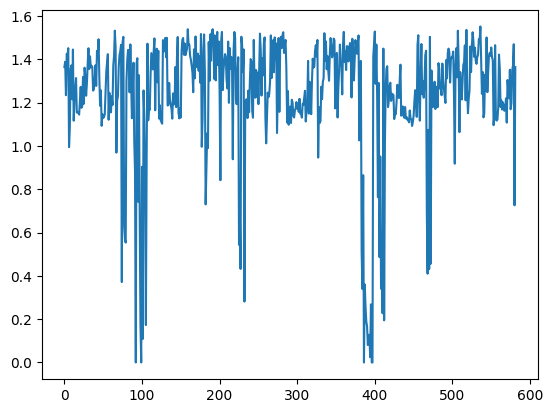

In [113]:
data=[]
for i in range(len(X)):
  data.append(complexity(X[i]))
plt.plot(data)
plt.show()

In [114]:
LL,UL=[],[]
ll,ul=p(data)

0.7894020869927107 1.7947828157940844


In [115]:
pred,actual=[],[]
for i in range(len(X)):
  j=complexity(X[i])
  if j>ll and j<ul:
    pred.append(clf.predict(X[i].reshape(1,-1))[0])
    actual.append(y[i])
res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES))
print(res)


              precision    recall  f1-score   support

        fish       0.40      1.00      0.57       218
   jellyfish       0.00      0.00      0.00       153
     penguin       0.00      0.00      0.00        76
      puffin       0.00      0.00      0.00        35
       shark       0.00      0.00      0.00        33
    starfish       0.00      0.00      0.00        11
    stingray       0.00      0.00      0.00        15

    accuracy                           0.40       541
   macro avg       0.06      0.14      0.08       541
weighted avg       0.16      0.40      0.23       541



In [116]:
pred,actual=[],[]
for i in range(len(X)):
  j=complexity(X[i])
  if j<ll or j>ul:
    pred.append(clf.predict(X[i].reshape(1,-1))[0])
    actual.append(y[i])
res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES))
print(res)

              precision    recall  f1-score   support

        fish       0.71      0.55      0.62        31
   jellyfish       0.00      0.00      0.00         1
     penguin       0.00      0.00      0.00         6
      puffin       0.00      0.00      0.00         0
       shark       0.00      0.00      0.00         3
    starfish       0.00      0.00      0.00         0
    stingray       0.00      0.00      0.00         0

    accuracy                           0.41        41
   macro avg       0.10      0.08      0.09        41
weighted avg       0.54      0.41      0.47        41



# dynamic setting v1

lowerbound:1.2871201923194207 upperbound: 1.492879809722111
1.2871201923194207 1.492879809722111
lowerbound:0.6589811923394182 upperbound: 1.798901664319198
0.9730506923294194 1.6458907370206544
lowerbound:1.131628475049693 upperbound: 1.348944572740991
1.0259099532361773 1.5469086822607665


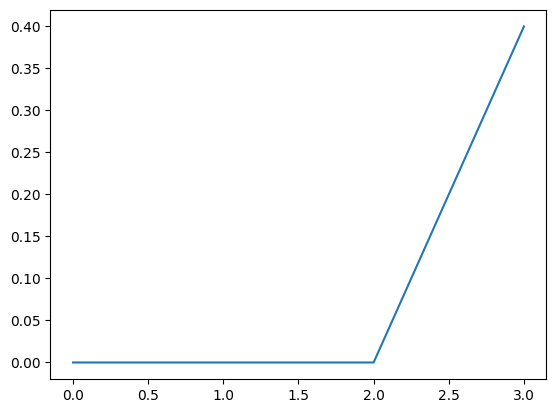

61


In [144]:
import warnings
warnings.filterwarnings("ignore")
LL,UL,accuracyl=[],[],[]
pred,actual,a,comp,test,ll,ul=[],[],0,[],True,0,0
rejected_image=0
for i in range(len(X)):
  j=complexity(X[i])
  comp.append(j)
  if test==False:
    if ul>j and ll<j:
      pred.append(clf.predict(X[i].reshape(1,-1))[0])
      actual.append(y[i])
    else:
      rejected_image+=1
  else:
    pred.append(clf.predict(X[i].reshape(1,-1))[0])
    actual.append(y[i])
  a+=1
  if a==5:
    res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES,output_dict=True))
    # print(res)
    accuracyl.append(res['accuracy'])
    if res['accuracy']<0.4:
      ll,ul=p(comp)
      pred,actual,a,comp=[],[],0,[]
      test=False
plt.plot(accuracyl)
plt.show()
print(rejected_image)


In [145]:
pred,actual=[],[]
for i in range(len(X)):
  j=complexity(X[i])
  if j>ll and j<ul:
    pred.append(clf.predict(X[i].reshape(1,-1))[0])
    actual.append(y[i])
res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES))
print(res)

              precision    recall  f1-score   support

        fish       0.40      1.00      0.57       207
   jellyfish       0.00      0.00      0.00       153
     penguin       0.00      0.00      0.00        71
      puffin       0.00      0.00      0.00        33
       shark       0.00      0.00      0.00        32
    starfish       0.00      0.00      0.00        11
    stingray       0.00      0.00      0.00        15

    accuracy                           0.40       522
   macro avg       0.06      0.14      0.08       522
weighted avg       0.16      0.40      0.23       522



In [146]:
pred,actual=[],[]
for i in range(len(X)):
  j=complexity(X[i])
  if j<ll or j>ul:
    pred.append(clf.predict(X[i].reshape(1,-1))[0])
    actual.append(y[i])
res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES))
print(res)

              precision    recall  f1-score   support

        fish       0.65      0.67      0.66        42
   jellyfish       0.00      0.00      0.00         1
     penguin       0.00      0.00      0.00        11
      puffin       0.00      0.00      0.00         2
       shark       0.00      0.00      0.00         4
    starfish       0.00      0.00      0.00         0
    stingray       0.00      0.00      0.00         0

    accuracy                           0.47        60
   macro avg       0.09      0.10      0.09        60
weighted avg       0.46      0.47      0.46        60



# dynamic setting v2

lowerbound:1.2871201923194207 upperbound: 1.492879809722111
1.2871201923194207 1.492879809722111
lowerbound:0.6589811923394182 upperbound: 1.798901664319198
0.6589811923394182 1.798901664319198
lowerbound:1.131628475049693 upperbound: 1.348944572740991
0.6589811923394182 1.798901664319198


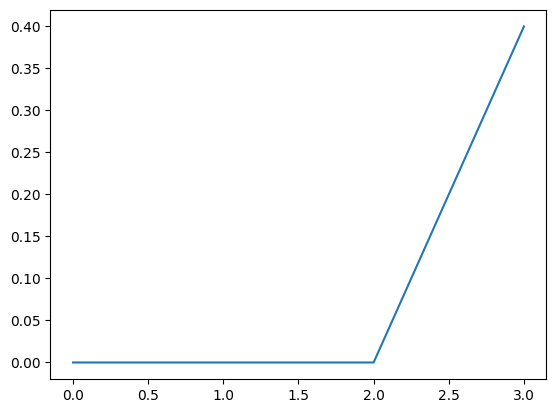

36


In [157]:
import warnings
warnings.filterwarnings("ignore")
LL,UL,accuracyl=[],[],[]
pred,actual,a,comp,test,ll,ul,bestacc=[],[],0,[],True,0,0,0
rejected_image=0
for i in range(len(X)):
  j=complexity(X[i])
  comp.append(j)
  if test==False:
    if ul>j and ll<j:
      pred.append(clf.predict(X[i].reshape(1,-1))[0])
      actual.append(y[i])
    else:
      rejected_image+=1
  else:
    pred.append(clf.predict(X[i].reshape(1,-1))[0])
    actual.append(y[i])
  a+=1
  if a==5:
    res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES,output_dict=True))
    # print(res)
    accuracyl.append(res['accuracy'])
    if res['accuracy']<=bestacc:
      ll,ul=p(comp)
      pred,actual,a,comp=[],[],0,[]
    if res['accuracy']>bestacc:
      bestacc=res['accuracy']
    test=False
plt.plot(accuracyl)
plt.show()
print(rejected_image)

In [158]:
LL,UL=[],[]
go(ll,ul)

              precision    recall  f1-score   support

        fish       0.71      0.46      0.56        26
   jellyfish       0.00      0.00      0.00         0
     penguin       0.00      0.00      0.00         5
      puffin       0.00      0.00      0.00         0
       shark       0.00      0.00      0.00         3
    starfish       0.00      0.00      0.00         0
    stingray       0.00      0.00      0.00         0

    accuracy                           0.35        34
   macro avg       0.10      0.07      0.08        34
weighted avg       0.54      0.35      0.43        34



In [159]:
LL,UL=[],[]
gno(ll,ul)

              precision    recall  f1-score   support

        fish       0.41      1.00      0.58       223
   jellyfish       0.00      0.00      0.00       154
     penguin       0.00      0.00      0.00        77
      puffin       0.00      0.00      0.00        35
       shark       0.00      0.00      0.00        33
    starfish       0.00      0.00      0.00        11
    stingray       0.00      0.00      0.00        15

    accuracy                           0.41       548
   macro avg       0.06      0.14      0.08       548
weighted avg       0.17      0.41      0.24       548



lowerbound:1.2871201923194207 upperbound: 1.492879809722111
1.2871201923194207 1.492879809722111
lowerbound:0.6589811923394182 upperbound: 1.798901664319198
0.6589811923394182 1.798901664319198
lowerbound:1.131628475049693 upperbound: 1.348944572740991
0.6589811923394182 1.798901664319198
lowerbound:1.1515100776836826 upperbound: 1.1585443739011154
0.6589811923394182 1.798901664319198
lowerbound:1.0523279791272553 upperbound: 1.404533859793578
0.6589811923394182 1.798901664319198


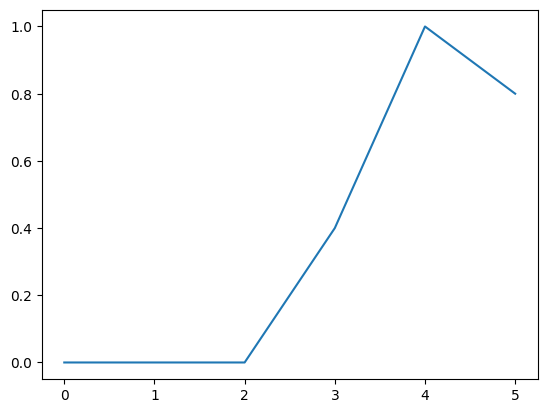

36


In [162]:
import warnings
warnings.filterwarnings("ignore")
LL,UL,accuracyl=[],[],[]
pred,actual,a,comp,test,ll,ul,bestacc=[],[],0,[],True,0,0,0
rejected_image=0
for i in range(len(X)):
  j=complexity(X[i])
  comp.append(j)
  if test==False:
    if ul>j and ll<j:
      pred.append(clf.predict(X[i].reshape(1,-1))[0])
      actual.append(y[i])
    else:
      rejected_image+=1
  else:
    pred.append(clf.predict(X[i].reshape(1,-1))[0])
    actual.append(y[i])
  a+=1
  if a==5:
    res=(classification_report(actual, pred,labels=list(range(len(CLASS_NAMES))),target_names=CLASS_NAMES,output_dict=True))
    # print(res)
    accuracyl.append(res['accuracy'])
    if res['accuracy']>=bestacc:
      ll,ul=p(comp)
      pred,actual,a,comp=[],[],0,[]
    if res['accuracy']>bestacc:
      bestacc=res['accuracy']
    test=False
plt.plot(accuracyl)
plt.show()
print(rejected_image)

# trash

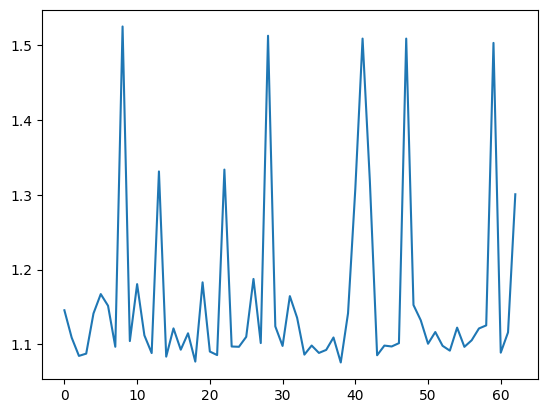

In [95]:
data=[]
for i in os.listdir("/content/aquarium_pretrain/test/images"):
  img=imread(f"/content/aquarium_pretrain/test/images/{i}")
  img = cv2.resize(img, (28,28))
  img = np.array(img, dtype=np.float32) / 255.0
  img = img.flatten()
  data.append(complexity(img))
# for i in range(len(X)):
#   data.append(complexity(X[i]))
plt.plot(data)
plt.show()

In [96]:
LL,UL=[],[]
ll,ul=p(data)

1.013797715262592 1.2352890803821128


In [107]:
print(accuracyl)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
